# LIN 350: Analyzing Linguistic Data, Spring 2025, Erk

# Homework 1: Data exploration and first steps in Python

## Due: Thursday Feb 6, end of day

## Your name: Wendy Geronimo
## Your EID: wag676

This homework comes with the following files:

* ALD_hw1 ipynb: this notebook, which has the homework problems. **Please put your answers into this same notebook.**

* bulwer_lytton.txt, a passage of text to use as data
  for some of the problems;

* nyt_opinion.csv, a comma-separated-values file containing a data frame to use for some of the problems.

Please record all your answers in the appropriate place in this notebook, and **do not forget to put your name and EID at the top of this notebook**.


For the part of the homework that requires you to write Python code,
we need to see the code, but not necessarily the output that the code
produced (unless the problem explicitly asks for it).
You can omit statements that
produced an error or that did not form part of the eventual solution,
but please include all the Python code that formed part of your
solution. 

### Important note: Before you do anything else, please hit the fast-forward button on this notebook, and confirm "Restart and Run all cells", so the code included in this notebook will be executed on your machine.


**If any of these instructions do not make sense to you, please get in
 touch with the instructor right away.**


A perfect solution to this homework will be worth *100* points. 


# Problem 1: Practicing strings and conditions (10 pts.) 

## (a)
   
You have two variables, `word1` and `word2` containing
strings. Write code that prints (using the function `print()`) 
the word that is earlier in the dictionary. Extend the following code
snippet to achieve this:

In [45]:
word1 = "panda"
word2 = "ocelot"

# of word1, word2, print the one that is earlier in the dictionary
if word1 < word2:
    print(word1)
else:
    print(word2)

ocelot


That same code also needs to work when used to extend this code snippet:

```
word1 = "bear"
word2 = "camel"
```

(That is, you need to use `if` to pick out the right word to print.)


## (b) 

Extend your code from (a) such that it will ignore
  capitalization. That is, if `word1 = "Panda"`  and
`word2 = "ocelot"`, it should still print "ocelot" and not "Panda". 

In [46]:
if word1.lower() < word2.lower():
    print(word1)
else:
    print(word2)

ocelot


# Problem 2: Identifying the end of a sentence, and counting words (15 pts.)

The phrase "It was a dark and stormy night" has been immortalized in
the *Charlie Brown* comics. It is also the 
beginning of the first sentence of a novel -- a sentence so long and
melodramatic that it has given rise to a contest. The *Bulwer
  Lytton Fiction Contest*, named after the author Edward
Bulwer-Lytton, challenges people to "write an atrocious opening sentence to the worst novel never written." See https://www.bulwer-lytton.com/

The file *bulwer_lytton.txt*,
distributed with this homework, contains the first paragraph of the
novel *Paul Clifford* by Edward Bulwer-Lytton, the novel with the
famous first sentence. Your task is to write Python code to determine
exactly how long the first sentence of the novel is. Start by either reading in the
contents of the file *bulwer_lytton.txt* with Python code, or
by copying the contents of the file to a Python string enclosed in
triple quotes. 
You can then either 
* identify the index of the first sentence-ending punctuation (via
  Python code, not by manual counting),
* retain only the slice of text before that index, and
* split the slice into words. This gives you a list. Count words by determining the
  length of the list. 

Or you can
* Split the text into words, and
* count until you encounter a word ending in a sentence-ending punctuation.

If you want to go the latter route, it will be useful to know that the
command `break`, written inside a loop, lets you exit the loop
immediately. 


In [47]:
# file text with triple quotes -> string
text = """It was a dark and stormy night; the rain fell in torrents, except at
occasional intervals, when it was checked by a violent gust of wind
which swept up the streets (for it is in London that our scene lies),
rattling along the house-tops, and fiercely agitating the scanty flame
of the lamps that struggled against the darkness. Through one of the
obscurest quarters of London, and among haunts little loved by the
gentlemen of the police, a man, evidently of the lowest orders, was
wending his solitary way. He stopped twice or thrice at different shops
and houses of a description correspondent with the appearance of the
quartier in which they were situated, and tended inquiry for some
article or another which did not seem easily to be met with. All the
answers he received were couched in the negative; and as he turned from
each door he muttered to himself, in no very elegant phraseology, his
disappointment and discontent. At length, at one house, the landlord, a
sturdy butcher, after rendering the same reply the inquirer had hitherto
received, added, “But if this vill do as vell, Dummie, it is quite at
your sarvice!” Pausing reflectively for a moment, Dummie responded that
he thought the thing proffered might do as well; and thrusting it into
his ample pocket, he strode away with as rapid a motion as the wind and
the rain would allow. He soon came to a nest of low and dingy buildings,
at the entrance to which, in half-effaced characters, was written
“Thames Court.” Halting at the most conspicuous of these buildings, an
inn or alehouse, through the half-closed windows of which blazed out in
ruddy comfort the beams of the hospitable hearth, he knocked hastily at
the door. He was admitted by a lady of a certain age, and endowed with a
comely rotundity of face and person."""

# sentence-ending punctuation
sentence_endings = {'.', '!', '?'}

# find index of first sentence-ending punctuation
end_index = next((i for i, char in enumerate(text) if char in sentence_endings), None)

# slice text to first sentence-ending punctuation
if end_index is not None:
    first_sentence = text[:end_index + 1]
else:
    first_sentence = text  # if no punc. found, default to full text
    
# split first sentence into words and count them
words = first_sentence.split()
word_count = len(words)

print(f"The first sentence has {word_count} words.")

The first sentence has 58 words.


# Problem 3: Stopwords (15 pts.)


For this problem, you will analyze the Bulwer-Lytton passage with and
without *stopwords*. Stopwords are frequent words, many of them
function words, that are often excluded from text analysis. The
Natural Language Toolkit (NLTK) has stopword lists for a number of
languages in its data collection. Here is how to get the English
stopwords: 

In [50]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stopword_list = set(stopwords.words("english"))  # set for faster lookup

# tokenize passage
words = word_tokenize(passage)

# define passage
passage = """It was a dark and stormy night; the rain fell in torrents, except at 
occasional intervals, when it was checked by a violent gust of wind
which swept up the streets (for it is in London that our scene lies),
rattling along the house-tops, and fiercely agitating the scanty flame
of the lamps that struggled against the darkness. Through one of the
obscurest quarters of London, and among haunts little loved by the
gentlemen of the police, a man, evidently of the lowest orders, was
wending his solitary way. He stopped twice or thrice at different shops
and houses of a description correspondent with the appearance of the
quartier in which they were situated, and tended inquiry for some
article or another which did not seem easily to be met with. All the
answers he received were couched in the negative; and as he turned from
each door he muttered to himself, in no very elegant phraseology, his
disappointment and discontent. At length, at one house, the landlord, a
sturdy butcher, after rendering the same reply the inquirer had hitherto
received, added, “But if this vill do as vell, Dummie, it is quite at
your sarvice!” Pausing reflectively for a moment, Dummie responded that
he thought the thing proffered might do as well; and thrusting it into
his ample pocket, he strode away with as rapid a motion as the wind and
the rain would allow. He soon came to a nest of low and dingy buildings,
at the entrance to which, in half-effaced characters, was written
“Thames Court.” Halting at the most conspicuous of these buildings, an
inn or alehouse, through the half-closed windows of which blazed out in
ruddy comfort the beams of the hospitable hearth, he knocked hastily at
the door. He was admitted by a lady of a certain age, and endowed with a
comely rotundity of face and person."""

# remove stopwords and punctuation
filtered_words = [word for word in words if word.lower() not in stopword_list and word.isalnum()]

# print filtered passage
filtered_passage = " ".join(filtered_words)
print("Filtered Passage (without stopwords):\n", filtered_passage)

Filtered Passage (without stopwords):
 dark stormy night rain fell torrents except occasional intervals checked violent gust wind swept streets London scene lies rattling along fiercely agitating scanty flame lamps struggled darkness one obscurest quarters London among haunts little loved gentlemen police man evidently lowest orders wending solitary way stopped twice thrice different shops houses description correspondent appearance quartier situated tended inquiry article another seem easily met answers received couched negative turned door muttered elegant phraseology disappointment discontent length one house landlord sturdy butcher rendering reply inquirer hitherto received added vill vell Dummie quite sarvice Pausing reflectively moment Dummie responded thought thing proffered might well thrusting ample pocket strode away rapid motion wind rain would allow soon came nest low dingy buildings entrance characters written Thames Halting conspicuous buildings inn alehouse windows blaze

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wgero\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## (a) 
Inspect the contents of *stopwordlist*: Some of the words
  on it are function words, but not all. What else is on the list?

In [14]:
# get English stopwords list
stopwordlist = stopwords.words("english")

# print first 50 stopwords to get an idea of the list
print(stopwordlist[:50])  

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be']


*Besides function words, other components in the stopword list include pronouns, common verbs, and adverbs.*

  
## (b)

How many words (word occurrences, not unique words) in the first paragraph of *Paul Clifford* are *not* in the stopword list?

To determine this, use again the text in
  *bulwer_lytton.txt*.

  In a first step, split the text into words while also splitting off the
  punctuation into separate words, using the following command. If
  you have stored the Bulwer-Lytton passage (as a string) in a
  variable named `bulwerlytton`, you would write:
  
  ```words = nltk.word_tokenize(bulwerlytton)```
  
  Note: If you are running in Colab, you also need to run:
  
  ```import nltk```
  
  ```nltk.download('punkt_tab')```

  Second, iterate through your list of words, and count only the words
  that are not on the stopword list. (It is okay that you also count
  "words" that are punctuation symbols. We take care of that below.)
  To do this, you will need a Boolean expression that tests whether an
  element is in a list. If you wanted to test whether the string
  ''in'' is in a list `['at', 'in', 'the']`, you would write:

 ```"in" in ['at', 'in', 'the']```

  which would yield True.

  Overall, this second step follows the "loop and fill a container" programming idiom: Start a container for storing numbers, and update it as you
  iterate over the list of words.

In [16]:
# tokenize text
words = nltk.word_tokenize(passage)

# setting list of English stopwords
stopwordlist = set(stopwords.words("english"))

# count words not in the stopword list
non_stopword_count = 0
for word in words:
    # check if word isn't in the stopword list
    if word.lower() not in stopwordlist:
        non_stopword_count += 1

# result
print("Number of words not in the stopword list:", non_stopword_count)

Number of words not in the stopword list: 194


## (c) 

Now redo the analysis from part (b), but do not count strings
  that are punctuation symbols. It is enough if you consider the following
  punctuation symbols:


In [40]:
punctuationlist = [ ';', '!', '.', '(', ')', ',', '?' ]

# tokenize  text
words = nltk.word_tokenize(passage)

# setting list of English stopwords
stopwordlist = set(stopwords.words("english"))

# count words not in the stopword list and not punctuation
non_stopword_count = 0
for word in words:
    # check if word isn't in the stopword list and not in punctuation list
    if word.lower() not in stopwordlist and word not in punctuationlist:
        non_stopword_count += 1

# result
print("Number of words not in the stopword list (excluding punctuation):", non_stopword_count)

Number of words not in the stopword list (excluding punctuation): 153


# Problem 4: A first inspection of the NYT opinion dataset (10 pts.)

In this and the following problems, you will work with a small dataset that describes the
number of occurrences of several words (I, the, Obama, McCain, etc.) in
80 editorial articles from the New York Times from August to December 2008. There are articles from four authors (Gail Collins,
Maureen Dowd, William Kristol, and Paul Krugman). This dataset is in
the file *nyt_opinion.csv*, which was distributed with this
homework. Make sure the file is in the same directory as the notebook. If you are running in Colab, you need to drop the file into the online folder in Colab.

Load the file into a pandas DataFrame, and call the data frame
`nyt`. Use the method `head()` to inspect the first few
rows of the data frame to make sure it has loaded okay and looks as
you would expect it to look.

Using
```nyt.describe()```
you can obtain summary statistics about all columns of the data frame,
showing mean, minimum, maximum and a few other pieces of information. 
Note one interesting pattern you can see in the result.

In [19]:
import pandas as pd

# load data into a DataFrame
nyt = pd.read_csv("nyt_opinion.csv")

# show first few rows to inspect dataset
print(nyt.head())

# summary statistics
print(nyt.describe())

    Author        FileName  NumWords  the   a  to  of  and  he  she  ...  \
0  collins  09-19-2008.txt       857   53  27  20  26   11  14    0  ...   
1  collins  11-22-2008.txt       829   54  25  26  24   14   5    1  ...   
2  collins  08-20-2008.txt       831   37  20  19  15   14  12    0  ...   
3  collins  10-04-2008.txt       822   52  13  28  26   16   0   26  ...   
4  collins  09-11-2008.txt       832   42  21  24   9   12   5    3  ...   

   sarah  joe  hillary  george  financial  crisis  economy  campaign  \
0      1    0        0       1          4       6        1         2   
1      0    0        0       2          0       1        1         0   
2      0    3        1       0          0       3        0         1   
3      2    1        0       0          1       0        0         1   
4      5    0        3       0          0       0        2         3   

   government        Date  
0           1  2008-09-19  
1           1  2008-11-22  
2           3  2008-08-20 

*An interesting pattern is that while function words like "the" (mean = 46.79) and "I" (mean = 5.54) appear frequently, names like "Obama" (mean = 1.2) and "McCain" (mean = 1.0) are mentioned less often, though some articles feature them prominently with higher maximum counts (13 and 14).*

# Problem 5: Lengths of editorials in the NYT opinion dataset (20 pts.)


The length of each editorial is given in the column
`NumWords`. Use Python code to answer the following questions:

1. How long is the longest editorial?
2. How long is the shortest?
3. How long are they on average?
4. How many editorials are there all in all? How many editorials have more than 800 words? 
5. Draw a histogram of editorial lengths.

Do the editorials differ widely in length or not? Why do you think
that is so?

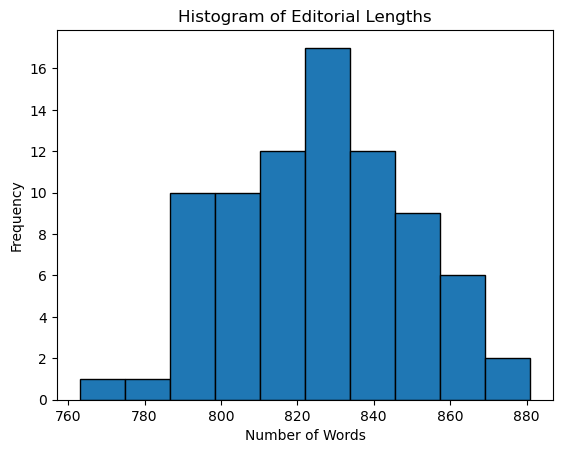

Longest editorial length: 881
Shortest editorial length: 763
Average editorial length: 825.7125
Total number of editorials: 80
Number of editorials with more than 800 words: 66


In [52]:
import matplotlib.pyplot as plt

nyt = pd.read_csv("nyt_opinion.csv")

# length of longest editorial
longest = nyt['NumWords'].max()

# length of shortest editorial
shortest = nyt['NumWords'].min()

# average length of editorials
average_length = nyt['NumWords'].mean()

# total number of editorials
total_editorials = nyt.shape[0]

# number of editorials with more than 800 words
more_than_800 = nyt[nyt['NumWords'] > 800].shape[0]

# histogram of editorial lengths
plt.hist(nyt['NumWords'], bins=10, edgecolor='black')
plt.title("Histogram of Editorial Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# answers
print(f"Longest editorial length: {longest}")
print(f"Shortest editorial length: {shortest}")
print(f"Average editorial length: {average_length}")
print(f"Total number of editorials: {total_editorials}")
print(f"Number of editorials with more than 800 words: {more_than_800}")

*The editorials do not differ widely in length. The longest is 881 words, the shortest is 763, with an average of 825.7 words. Most editorials are close to this average, indicating that there's likely a standard editorial length or guideline followed by the authors, leading to consistent word counts across the dataset.*

# Problem 6: Selecting parts of a data frame (15 pts.)


1. How many editorials are written by Collins?
2. How many editorials mention "mccain" at least once? 
3. How many editorials mention both "biden" and "palin"?

In [42]:
# editorials by Collins
collins_editorials = nyt[nyt['Author'] == 'collins']
num_collins_editorials = collins_editorials.shape[0]

# editorials mentioning "mccain" at least once
mccain_editorials = nyt[nyt['mccain'] > 0]
num_mccain_editorials = mccain_editorials.shape[0]

# editorials mentioning both "biden" and "palin"
biden_palin_editorials = nyt[(nyt['biden'] > 0) & (nyt['palin'] > 0)]
num_biden_palin_editorials = biden_palin_editorials.shape[0]

# results
num_collins_editorials, num_mccain_editorials, num_biden_palin_editorials

(20, 47, 10)

# Problem 7: Summing numbers in data frames (10 pts.)

The Python function `sum( )` sums up a list or a pandas Series
of numbers. Here are
some examples:

In [11]:
sum([1,2,3,4])

10

In [12]:
import pandas as pd

vec = pd.Series([2,4,6,8])
sum(vec)

20

With the `nyt` dataframe, you can do

```sum(nyt.i)```

This is the summed number of mentions of "I" across all the
editorials, which is 443.

Use this function to answer the following questions:
1. Across all editorials, how often is "obama" mentioned? How often "crisis"? (Remember that these editorials were written at the time of an economic crisis.)
2. Across all editorials *that have been written by Krugman*, how often does Krugman mention "obama"? How often does he mention "crisis"? Comment on your findings. 

In [43]:
# sum mentions of "obama" and "crisis" across all editorials
total_obama_mentions = sum(nyt['obama'])
total_crisis_mentions = sum(nyt['crisis'])

# sum mentions of "obama" and "crisis" in editorials written by Krugman
krugman_editorials = nyt[nyt['Author'] == 'krugman']
krugman_obama_mentions = sum(krugman_editorials['obama'])
krugman_crisis_mentions = sum(krugman_editorials['crisis'])

# results
total_obama_mentions, total_crisis_mentions, krugman_obama_mentions, krugman_crisis_mentions

(340, 100, 30, 63)

*"Obama" is mentioned 340 times across all editorials, likely due to the 2008 election period. "Crisis" is mentioned 100 times, reflecting the focus on the economic downturn. In Krugman’s editorials, "Obama" is mentioned 30 times and "crisis" 63 times, which is higher than the overall average, as his writings often focus on both politics and the financial crisis.*

# Problem 8: Dates, sorting, and plotting (20 pts.)


The `nyt` data frame has a column called "Date". When you
read the data frame from file, it encodes "Date" in a way that is
not useful. But Pandas has a data type called a *timestamp*, and
you can transform the data into this format, which then lets you compare
dates. Pandas has a method to do that, called `to_datetime`. 

To apply it to `nyt.Date`, use the following code. It changes
the `Date` column of `nyt` to be timestamps. (You only
need the "import" line if you haven't executed it before.)

```import pandas as pd```

```nyt.Date = pd.to_datetime(nyt.Date)```

Next, let's sort the whole data frame by date. This is a one-liner in
Pandas:

```nyt_sorted = nyt.sort_values(by = "Date")```

Now `nyt_sorted` is a data frame that contains the same
information as `nyt`, but has the rows sorted by the date each
editorial was published. 

Using this new data frame `nyt_sorted`, please plot some word counts: 

## (a) 
Using `nyt_sorted`, plot the mentions of "mccain" with
  "Date" on the x-axis. Make sure you have a title for the whole
  plot, as well as labels on the x-axis and on the y-axis. 
Make sure to state `%matplotlib inline`
first so you can see the plot in the notebook.

Say what you observe in the plot, and comment on it.

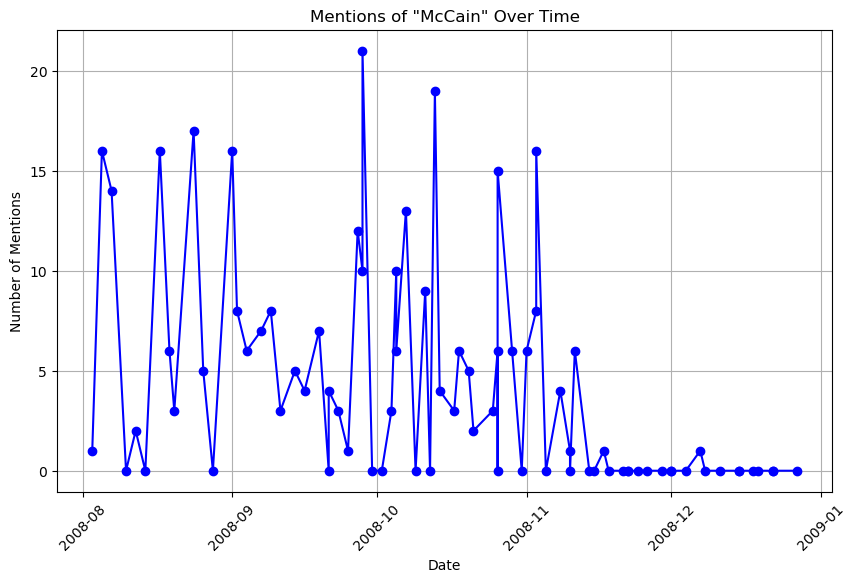

In [44]:
# convert 'Date' column to datetime format
nyt.Date = pd.to_datetime(nyt.Date)

# sort data by 'Date'
nyt_sorted = nyt.sort_values(by="Date")

# plot mentions of "mccain" over time
plt.figure(figsize=(10,6))
plt.plot(nyt_sorted['Date'], nyt_sorted['mccain'], marker='o', linestyle='-', color='b')
plt.title('Mentions of "McCain" Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.show()

*The plot shows 'McCain' mentions from August 2008 to January 2009. The x-axis represents dates, and the y-axis shows mentions, ranging from 0 to 20. Spikes in October 2008 align with significant political events, suggesting higher mentions during increased media coverage.*

## (b)

For this problem, you will compare the discussion of the election (ad represented through counts of "obama") and the  discussion of the   economic crisis (as represented through counts of "economy") in the editorials of both Collins and Krugman. 

Like in the *inaugural* notebook, make a new data frame
`nyt1` that
only retains the following columns from `nyt_sorted`: "economy", "obama",
"Date", "Author".

Then, again like in the *inaugural* notebook, use
`set_index()` to make the `'Date'` column the index of
`nyt1`. 

Then build *two* new data frames from `nyt1`:
`nyt1_krugman` should contain only
those rows from `nyt1` where the author is Krugman, and 
`nyt1_collins` should contain only
those rows from `nyt1` where the author is Collins. 

Now visualize both the "economy" and "obama" counts for Collins in
a single chart, with title, axis labels, and legend. (Absolute counts
are fine.)

Do a separate chart for the "economy" and "obama" counts for
Krugman, again with title, axis labels, and legend. (Absolute counts
are fine.)

Say what you observe when comparing the two plots, and comment on it. 


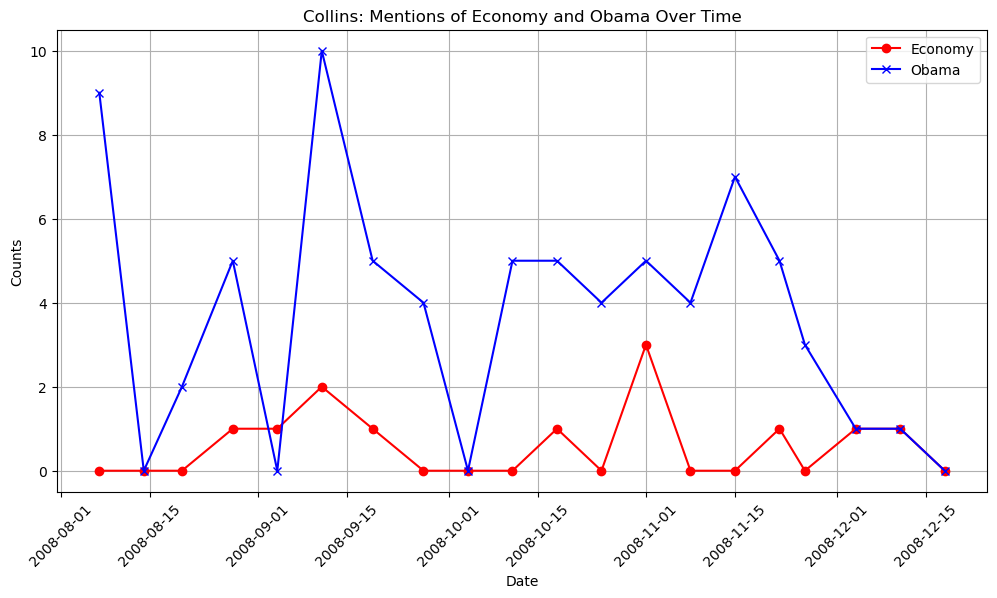

In [38]:
# DataFrame nyt1
nyt1 = nyt_sorted[['economy', 'obama', 'Date', 'Author']]

# 'Date' as the index
nyt1.set_index('Date', inplace=True)

# separate DataFrames for Krugman and Collins
nyt1_krugman = nyt1[nyt1['Author'] == 'krugman']
nyt1_collins = nyt1[nyt1['Author'] == 'collins']

# plot 'economy' and 'obama' counts for Collins
plt.figure(figsize=(12, 6))
plt.plot(nyt1_collins.index, nyt1_collins['economy'], marker='o', linestyle='-', color='r', label='Economy')
plt.plot(nyt1_collins.index, nyt1_collins['obama'], marker='x', linestyle='-', color='b', label='Obama')
plt.title('Collins: Mentions of Economy and Obama Over Time')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)ill 
plt.show()

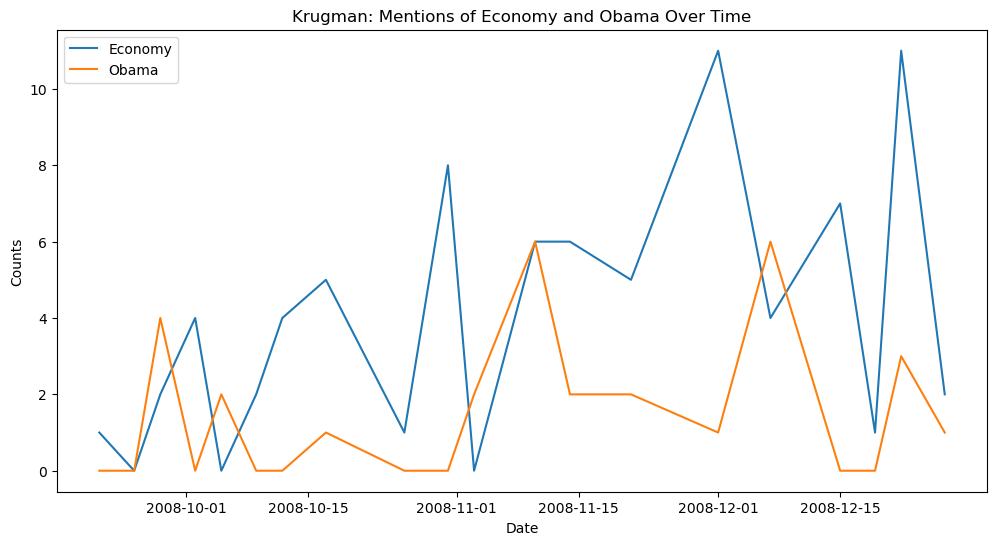

In [39]:
# viz 'economy' and 'obama' counts for Krugman
plt.figure(figsize=(12, 6))
plt.plot(nyt1_krugman.index, nyt1_krugman['economy'], label='Economy')
plt.plot(nyt1_krugman.index, nyt1_krugman['obama'], label='Obama')
plt.title('Krugman: Mentions of Economy and Obama Over Time')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.show()

**Observations and Comparisons on the 2 plots**:
<br>
Collins mentions Obama more frequently than the economy, with sharp spikes, especially in August and September 2008. In contrast, Krugman focuses more on the economy, showing a steadier rise and fall with multiple peaks in December 2008. While Collins' data highlights political discussions, Krugman’s mentions suggest a stronger emphasis on economic issues. Both reflect key events in late 2008 but with different main points.